## Some Libraries that we will need  

In [1]:
# For preprocessing and Visualization: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For trying many technickes to choose the best of them:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For dissimilarity matrix
from sklearn.metrics import pairwise_distances

import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Simple view of the data 

In [3]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 150 observations and 5 features in this dataset. 



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observations:**
* There is no null values.
* There is no problem with the data types.

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


* The data seems to be alright (No Outliers)

In [6]:
# Number of unique species     
df["species"].nunique()

3

In [7]:
# Showing the uniqye values
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.duplicated().sum()

1

* There is a small amount of duplicates.

In [9]:
for i in list(df.columns):
    
    print("\n ************ "+i+" ************\n")
    print("\n",df[i].value_counts())
    print("\n",df[i].describe(),"\n")


 ************ sepal_length ************


 5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

 count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64 


 ************ sepal_width ************


 3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.6     4
3.7     3
2.4     3
2.2     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64

 count    150.000000
mean       3.057333
std        0.435866
min    

* The data seems to be alright (No Wrong values)
* The species column is a balanced class

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

## Visualization 

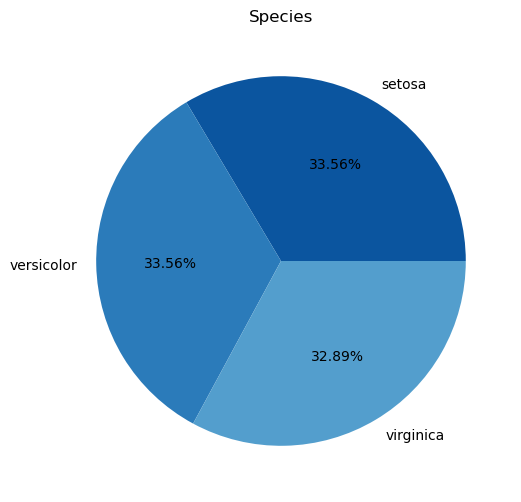

In [12]:
plt.figure(figsize = (12, 6))
species_df = (df['species'].value_counts(normalize = True)).sort_values(ascending = False).to_frame()
plt.pie(species_df['species'], labels = species_df.index, colors = sns.color_palette("Blues_r")
       ,autopct = '%0.2f%%');
plt.title("Species");

### The data is Balanced 

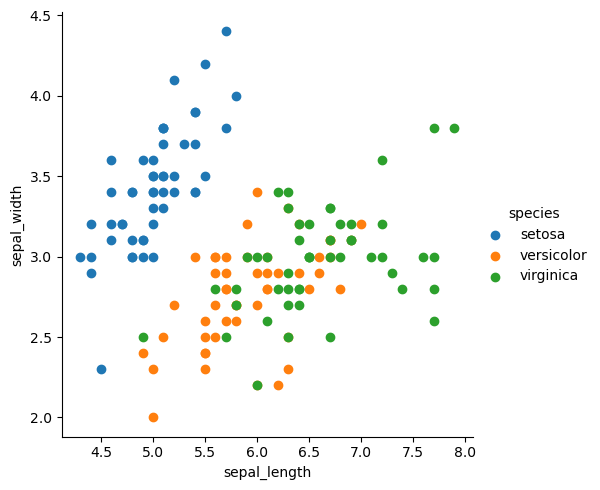

In [13]:
sns.FacetGrid(df, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();

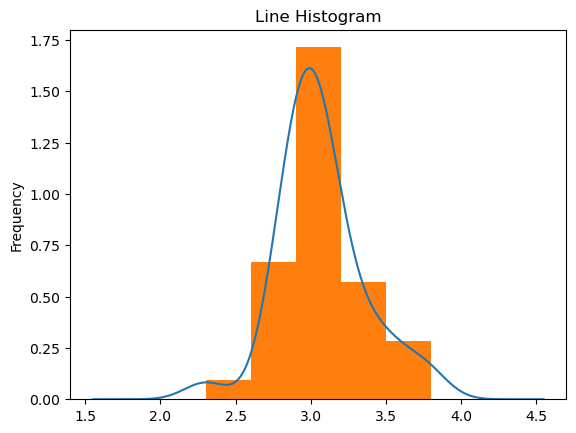

In [14]:
lineHist_data = df.groupby("sepal_length")["sepal_width"].agg(np.mean)
fig, ax = plt.subplots()
lineHist_data.plot.kde(ax=ax)
lineHist_data.plot.hist(density=True, ax=ax,bins=5)
plt.title("Line Histogram");

### Our data is Normally Distributed 

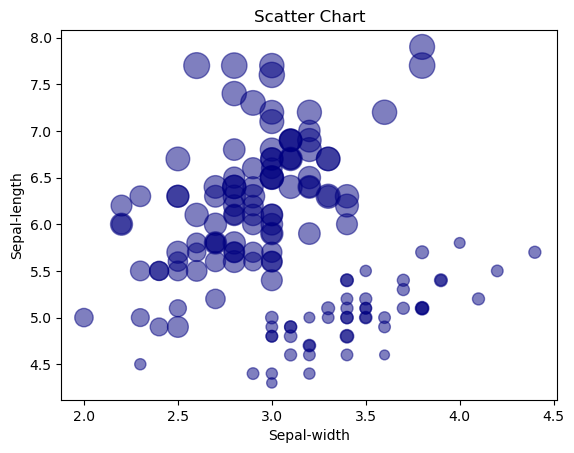

In [15]:
plt.scatter(x=df.sepal_width,y=df.sepal_length,alpha=0.5,s=50*df.petal_length,c="#000080")
plt.title("Scatter Chart")
plt.xlabel("Sepal-width")
plt.ylabel("Sepal-length");

##  Building the model

In [16]:
df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# Spliting the data into our Feature matrix (X) and our Target vector (y) 
X = df.drop(columns = "species")
y = df.species

In [18]:
print("X shape is:",X.shape)
print("y shape is:",y.shape)

X shape is: (149, 4)
y shape is: (149,)


In [19]:
# Spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=45)

print("X_train shape is:",X_train.shape)
print("y_train shape is:",y_train.shape)
print("X_test shape is:",X_test.shape)
print("y_test shape is:",y_test.shape)

X_train shape is: (104, 4)
y_train shape is: (104,)
X_test shape is: (45, 4)
y_test shape is: (45,)


###  KNeighborsClassifier Model

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=12)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=12)

In [21]:
# Getting the score of train and test data
print("Training Accuracy:" , round(knn_model.score(X_train, y_train),2),"%")
print("Testing Accuracy:" , round(knn_model.score(X_test, y_test),2),"%")

Training Accuracy: 0.97 %
Testing Accuracy: 1.0 %


### LogisticRegression Model 

In [22]:
LR_model = LogisticRegression()
LR_model.fit(X, y)

LogisticRegression()

In [23]:
# Getting the score of train and test data
print("Training Accuracy:" , round(LR_model.score(X_train, y_train),2),"%")
print("Testing Accuracy:" , round(LR_model.score(X_test, y_test),2),"%")

Training Accuracy: 0.96 %
Testing Accuracy: 1.0 %


### Euclidean Dissimilarity matrix 

In [24]:
euclidean_distance = pairwise_distances(df.drop(columns = "species"), metric='euclidean')

euclidean_dissimilarity_matrix = pd.DataFrame(euclidean_distance, columns=range(len(df)), index=range(len(df)))
euclidean_dissimilarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,0.000000,0.538516,0.509902,0.648074,0.141421,0.616441,0.519615,0.173205,0.921954,0.469042,...,4.796874,5.019960,4.636809,5.257376,5.136146,4.654031,4.276681,4.459821,4.650806,4.140048
1,0.538516,0.000000,0.300000,0.331662,0.608276,1.090871,0.509902,0.424264,0.509902,0.173205,...,4.860041,5.072475,4.702127,5.320714,5.206726,4.700000,4.249706,4.498889,4.718050,4.153312
2,0.509902,0.300000,0.000000,0.244949,0.509902,1.086278,0.264575,0.412311,0.435890,0.316228,...,5.026927,5.228767,4.868265,5.475400,5.353504,4.864155,4.430576,4.661545,4.848711,4.298837
3,0.648074,0.331662,0.244949,0.000000,0.648074,1.166190,0.331662,0.500000,0.300000,0.316228,...,4.910193,5.104900,4.760252,5.349766,5.232590,4.745524,4.288356,4.533211,4.719110,4.149699
4,0.141421,0.608276,0.509902,0.648074,0.000000,0.616441,0.458258,0.223607,0.921954,0.529150,...,4.844585,5.061620,4.686150,5.297169,5.173007,4.701064,4.330127,4.504442,4.678675,4.173727


In [25]:
# Saving the dissimilarity_matrix to a CSV file
euclidean_dissimilarity_matrix.to_csv('D:/Mzakra/Semester 5/Data Science Tools/euclidean_dissimilarity_matrix.csv')

### Cosine Dissimilarity matrix 

In [26]:
cosine_distance = pairwise_distances(df.drop(columns = "species"), metric='cosine')

cosine_dissimilarity_matrix = pd.DataFrame(cosine_distance, columns=range(len(df)), index=range(len(df)))
cosine_dissimilarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,2.220446e-16,1.420836e-03,0.000013,8.993932e-04,0.000242,0.000997,0.000920,0.000220,0.000865,0.001235,...,0.106492,0.121744,0.101473,0.124387,0.121381,0.110444,0.119100,0.108214,0.116091,0.113297
1,1.420836e-03,1.110223e-16,0.001209,1.206070e-03,0.002759,0.003074,0.003720,0.001086,0.000739,0.000348,...,0.093807,0.109221,0.089087,0.111931,0.109781,0.097767,0.104488,0.095850,0.106200,0.102126
2,1.265272e-05,1.208547e-03,0.000000,7.830166e-04,0.000332,0.000961,0.000964,0.000172,0.000717,0.001092,...,0.104634,0.119797,0.099600,0.122472,0.119482,0.108522,0.117090,0.106371,0.114331,0.111541
3,8.993932e-04,1.206070e-03,0.000783,1.110223e-16,0.001283,0.000865,0.001304,0.000231,0.000061,0.000614,...,0.089733,0.104040,0.085714,0.106114,0.103760,0.093828,0.101420,0.091231,0.098765,0.095558
4,2.423233e-04,2.759204e-03,0.000332,1.282958e-03,0.000000,0.000700,0.000397,0.000535,0.001470,0.002247,...,0.109453,0.124403,0.104496,0.126901,0.123621,0.113415,0.122762,0.110976,0.117599,0.115342


In [27]:
# Saving the dissimilarity_matrix to a CSV file
cosine_dissimilarity_matrix.to_csv('D:/Mzakra/Semester 5/Data Science Tools/cosine_dissimilarity_matrix.csv')